## Linear Regression 线性回归实例

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Step1:导入Boston房价数据

In [3]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

## Step2: 查看一下数据信息和房价的分布

In [4]:
print('the shape of X:', X.shape)
print('the shape of y:', y.shape)

the shape of X: (506, 13)
the shape of y: (506,)


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

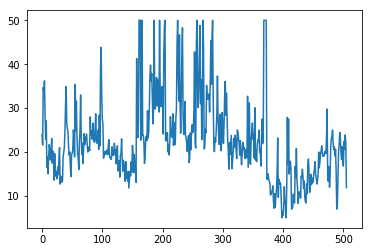

In [6]:
#查看房价的分布
plt.plot(range(len(y)),y)

## Step3:切割训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=19)

## Step4:使用sklearn中的线性回归模型

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
prediction = lin_reg.predict(X_test)


In [10]:
print('系数：',lin_reg.coef_)
print('截距：',lin_reg.intercept_)

系数： [-1.13840194e-01  5.84045120e-02 -9.99228713e-03  3.57857348e+00
 -1.68544503e+01  3.71215122e+00 -1.47294765e-02 -1.57861890e+00
  2.67590288e-01 -1.11833769e-02 -8.87993866e-01  8.89803675e-03
 -4.22383738e-01]
截距： 35.49955098805829


## Step5：使用4个评估指标来检测模型的好坏

In [11]:
# method1:自己手写评估指标

def MSE(prediction,y_test):
    return np.sum((prediction -y_test)**2) / len(y_test)

def RMSE(prediction, y_test):
    return np.sqrt(MSE(prediction, y_test))

def MAE(prediction, y_test):
    return np.sum(np.absolute(prediction - y_test)) / len(y_test)

def R2(prediction, y_test):
    return 1 - (MSE(y_test, prediction) / np.var(y_test))

mse_1 = MSE(y_test, prediction)
rmse_1 = RMSE(y_test, prediction)
mae_1 = MAE(y_test, prediction)
r2_1 = R2(prediction, y_test)

print('MSE:',mse_1)
print('RMSE:',rmse_1)
print('MAE:',mae_1)
print('R2:', r2_1)

MSE: 35.08314021765445
RMSE: 5.923102246091524
MAE: 3.7589800584217414
R2: 0.6647017039061681


In [12]:
# 使用sklearn封装好的评估指标
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse_2 = mean_squared_error(y_test, prediction)
rmse_2 = np.sqrt(mean_squared_error(y_test, prediction))
mae_2 = mean_absolute_error(y_test,prediction)
r2_2 = r2_score(y_test,prediction)

In [13]:
print('MSE:',mse_2)
print('RMSE:',rmse_2)
print('MAE:',mae_2)
print('R2:',r2_2)

MSE: 35.08314021765445
RMSE: 5.923102246091524
MAE: 3.7589800584217414
R2: 0.664701703906168


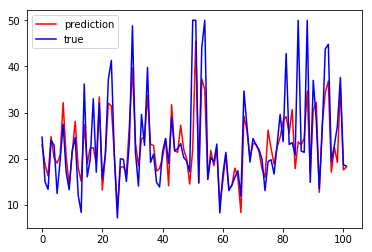

In [14]:
plt.plot(range(len(prediction)), prediction, color='r', label='prediction')
plt.plot(range(len(y_test)), y_test, color='b', label='true')
plt.legend()
plt.show()